# Parameterized Quantum Circuits

## Introduction

Parameterized quantum circuits are a fundamental building block of near-term quantum machine learning algorithms. They also go by the name parameterized trial states, variational forms (like we saw in last course), and ansatzes. Below is an example of how we create them:

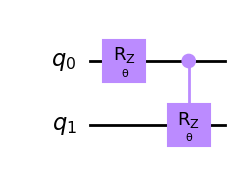

In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw()

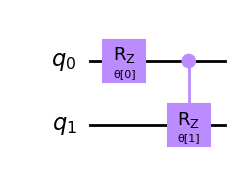

In [2]:
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('θ', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw()

## Parameterized quantum circuit properties

One main question is how do we choose one parameterized circuit over another? Well we want it to be able to 1) express/generate a significant subset of the states within our output Hilbert space and 2) be difficult to simulate classically, so it should involve entanglement. These two aspects are called expressibility and capability respectively.

### Expressibility

An example of circuits with different expressibility is circuit A which applies a Hadamard and then an Rz gate onto a single qubit, versus circuit B which applies a Hadamard, an Rz gate, and an Rx gate. The circuit A can only generate states along the equator of the Bloch sphere whereas circuit B can reach nearly everywhere on the Bloch sphere.

### Entangling capability

The Meyer-Wallach measure is a metric of how entangled a state is and ranges from 0 to 1 (classical to Bell state). Again, we want something that has a high Meyer-Wallach value. Researchh shows that there is a strong correlation between classification accuracy of a variational quantum classifier and expressibility and a weak correlation between classification accuracy and entangling capability.

### Hardware efficiency

Our near-term devices have limited qubit connectivity, coherence times, and gate fidelities so we want circuits that are not too deep to avoid a lot of error in our results. There are hardware efficient parameterized circuits that take into account device constraints and use a limited set of gates and a particular qubit connection topology.

## Parameterized quantum circuits for machine learning

Parameterized quantum circuits are used for two things in QML:

1. Encoding data where the parameter values are determined by the datapoint values
2. As a quantum model, where the parameters are determined by an optimization process

A common architecture is to have layers of Hadamard gates interleaved with entangling blocks for data encoding. Some examples are shown below:

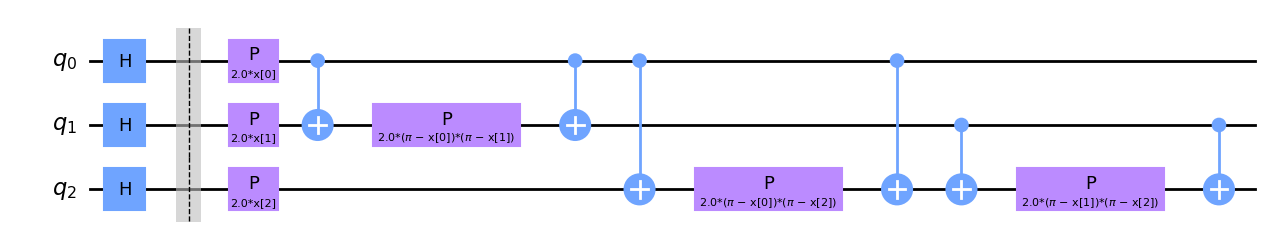

In [3]:
from qiskit.circuit.library import ZZFeatureMap
qc_zz = ZZFeatureMap(3, reps=1, insert_barriers=True)
qc_zz.decompose().draw()

Here is a hardware efficinet circuit used for a quantum model.

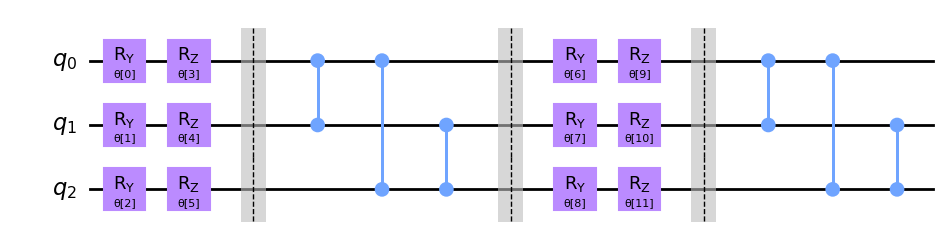

In [4]:
from qiskit.circuit.library import TwoLocal
qc_twolocal = TwoLocal(num_qubits=3, reps=2, rotation_blocks=['ry','rz'],
                entanglement_blocks='cz', skip_final_rotation_layer=True,
                insert_barriers=True)

qc_twolocal.decompose().draw()

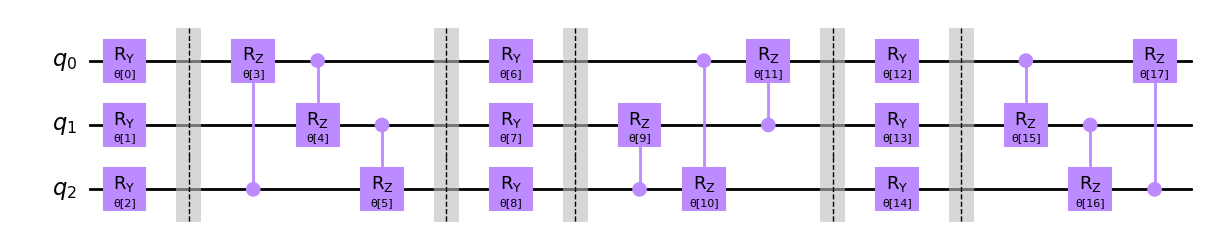

In [5]:
qc_13 = TwoLocal(3, rotation_blocks='ry',
                 entanglement_blocks='crz', entanglement='sca',
                 reps=3, skip_final_rotation_layer=True,
                 insert_barriers=True)

qc_13.decompose().draw()

Below are more generalized parameterized circuits that alternate rotation and entanglement layers.

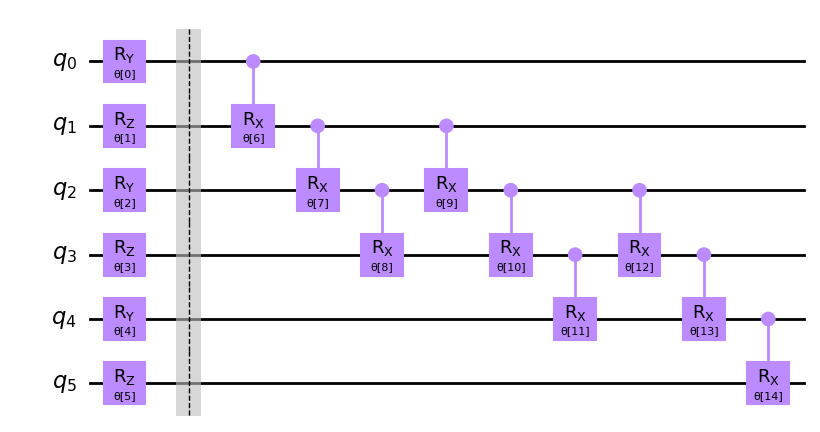

In [6]:
from qiskit.circuit.library import NLocal

# rotation block:
rot = QuantumCircuit(2)
params = ParameterVector('r', 2)
rot.ry(params[0], 0)
rot.rz(params[1], 1)

# entanglement block:
ent = QuantumCircuit(4)
params = ParameterVector('e', 3)
ent.crx(params[0], 0, 1)
ent.crx(params[1], 1, 2)
ent.crx(params[2], 2, 3)

qc_nlocal = NLocal(num_qubits=6, rotation_blocks=rot,
                   entanglement_blocks=ent, entanglement='linear',
                   skip_final_rotation_layer=True, insert_barriers=True)

qc_nlocal.decompose().draw()